# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

In this exercise sheet, we use deep neural networks to fit functions with increasing complexity, in order to learn how to build a deep neural network. In exercise 11.1, we start with a linear function. Exercise 11.2 regards the fit of a polynomial function, before we conclude this exercise sheet with the regression of a function that depends on two variables in exercise 11.3.

### Exercise 11.1

The scope of the first exercise of this exercise sheet is to fit the linear function:

$$f(x)=2x+1$$

using a deep neural network. In the following, we refer to this linear function as the **true model**. Here, we define a Python function to compute the value of our true model at an arbitrary feature value $x$:

In [4]:
# true model
def f_linear(x):
    return 2 * x + 1

#### Generating Training and Test Examples

We will concentrate on features $x\in[-1, 1]$. Hence, $f: [-1, 1] \rightarrow [-1, 3], x \mapsto 2x+1$. In the next Jupyter cell, we define a Python function to generate $N_{train}$ training examples and $N_{test}$ test examples from our true model $f$. The function is also able to handle true models with more than one feature. The features are drawn uniformly in the specified feature space. The labels are drawn from a Gaussian distribution with mean $0.0$ and standard deviation $\sigma$. The Gaussian distribution of the labels implements the statistical uncertainty of measurements in reality.

In [3]:
import numpy as np

# set seed
np.random.seed(0)

def gen_data(f, N_train, N_test, sigma, x_min=(-1,), x_max=(1,)):
    """
    Generate training and test examples from true model f.
    Min. and max. values specify the feature space.
    Feature values are drawn uniformly from the feature space.
    Labels are drawn from a Gaussian distribution with mean 0.0 and standard deviation sigma.
    """

    n_dim = len(x_min)  # dimension of feature space
    
    x_train = np.zeros([N_train, n_dim])
    x_test = np.zeros([N_test, n_dim])
    
    # draw features
    for i in range(n_dim):
        x_train[:, i] = np.random.uniform(x_min[i], x_max[i], N_train)
        x_test[:, i] = np.random.uniform(x_min[i], x_max[i], N_test)
    
    # draw labels
    y_train = np.random.normal(f(x_train), sigma)
    y_test = np.random.normal(f(x_test), sigma)
    
    return x_train, y_train, x_test, y_test

#### Sum of the Mean Square-Error (MSE)

Now, that we are able to generate training and test examples, we have to initialize our neural network. Since the feature space is one-dimensional, we only need a single neuron with an identity activation function to perform a linear regression. This means that we do not have any hidden layers and that the input layer coincides with the output layer. As the optimizer of the neural network, we use stochastic gradient descent (sgd). In this case, we are interest in minimizing the so-called **sum of the mean square-error (MSE)**:

$$ MSE= \frac{1}{N}\sum_{j=1}^{N} (y_j^\mathrm{pred}-y_j)^2.$$

Here, $N$ is the number of examples that are part of the computation of the MSE. When we train our model using our training examples $(x_{train}, y_{train})$, $N$ is $N_{train}$. In the training phase, the optimizer tries to find parameters (in this case the slope $m_{fit}$ and the intercept $b_{fit}$) that minimize the MSE w.r.t. the training set. For the evaluation of the obtained fit, the MSE is computed w.r.t to the test set. The next panel shows the initialization of the neural network:

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation

tf.random.set_seed(0)

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

The training of our neural network (containing only one neuron with an identity activation function) depends on a variaty of parameters. Among these, we have the number of epochs $N_{epochs}$ that describes, how often the whole training set is passed through the neural network. For the batch size, we leave the Keras standard setting $N_{batches}=32$. Another parameters regard the data points themselves. Here, we can vary the number of training examples $N_{train}$ and the noise of the labels $\sigma$.

Throughout this first exercise, we use $N_{test} = 64$ test examples. 

#### Number of Epochs $N_{epochs}$

We start with the analysis of the dependence of the fit quality on the number of epochs $N_{epochs}$. For this purpose, we set $N_{train} = 256$ and $\sigma = 0.0$ (as we only want to examine the dependence on the epoch size $N_{epochs}$).

In the figure below, we visualize how the test and the training MSE decrease with increasing number of epochs $N_{epochs}$. So, the predictive quality of our neural network increases significantly with the number of epochs $N_{epochs}$. This suggests that a neural network retrieves gradually information from the training data. In this sense, the term "machine learning" becomes clear. In this example, where the true model is a linear relationship without any noise, in principal, the neural network is able to find good estimates $m_{fit}$ and $b_{fit}$ even with only $2$ training examples. However, this is a particular simple case that would probably never happen in real applications of neural networks.

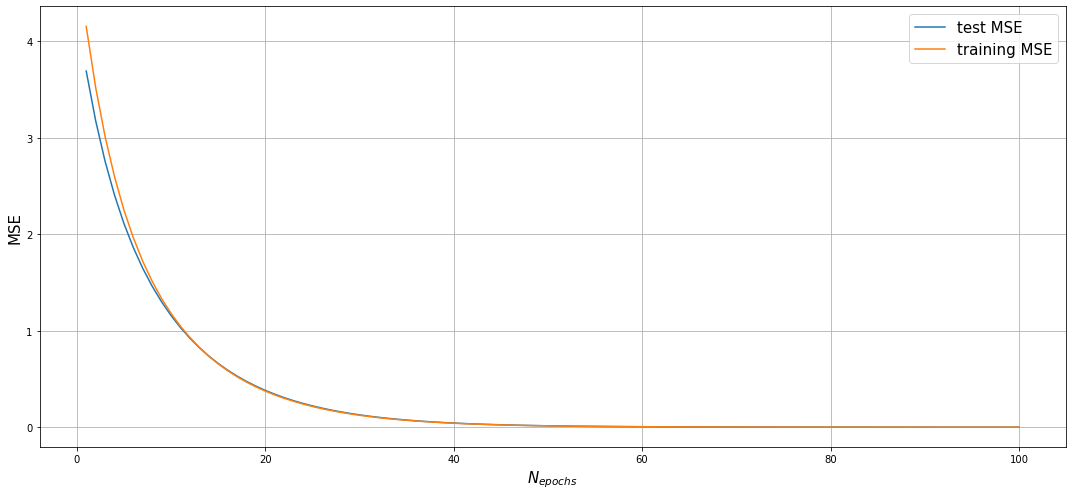

In [13]:
import matplotlib.pyplot as plt

N_epochs = 100  # total number of epochs

N_train = 256
N_test = 64
sigma = 0.0

# generate training and test examples from true model
x_train, y_train, x_test, y_test = gen_data(f_linear, N_train, N_test, sigma)

# initialize untrained NN
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# lists to store parameters for every epoch
m_fit = []
b_fit = []

# corresponding callback functions
slope_callback = tf.keras.callbacks.LambdaCallback \
( on_epoch_end=lambda epoch, logs: m_fit.append(model.get_weights()[0][0][0]))
intercept_callback = tf.keras.callbacks.LambdaCallback \
( on_epoch_end=lambda epoch, logs: b_fit.append(model.get_weights()[1][0]))

# fit model to data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=N_epochs,
          shuffle=True,
          validation_data=(x_test, y_test),
          verbose=0,
          callbacks=[slope_callback, intercept_callback])

# plot training and test MSE against epoch number
x = np.arange(1, N_epochs + 1)
plt.figure(figsize=(15, 7))
plt.plot(x, history.history["val_mse"], label="test MSE")
plt.plot(x, history.history["mse"], label="training MSE")
plt.xlabel(r"$N_{epochs}$", size=15)
plt.ylabel("MSE", size=15)
plt.legend(fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

In particular, the next figure shows that the fitted parameters $m_{fit}$ and $b_{fit}$ tend towards their true values $m_{true}$ and $b_{true}$ as we increase the number of epochs $N_{epochs}$ of our neural network. 

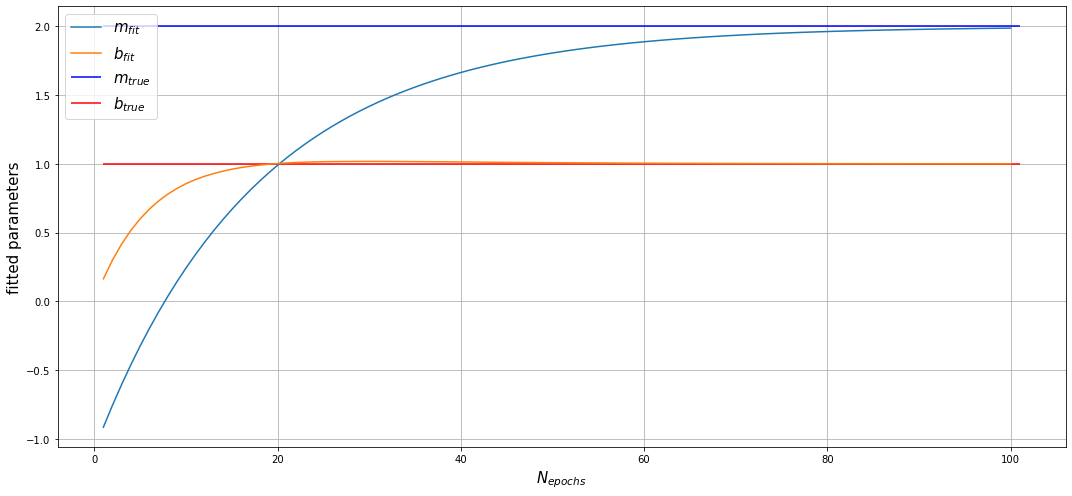

In [15]:
plt.figure(figsize=(15, 7))

plt.plot(x, m_fit, label=r"$m_{fit}$")
plt.plot(x, b_fit, label=r"$b_{fit}$")
plt.hlines(2, 1, N_epochs + 1, label=r"$m_{true}$", color="blue")
plt.hlines(1, 1, N_epochs + 1, label=r"$b_{true}$", color="red")

plt.xlabel(r"$N_{epochs}$", size=15)
plt.ylabel("fitted parameters", size=15)
plt.legend(fontsize=15)
plt.tight_layout()
plt.grid()
plt.show()

#### Number of Training Examples $N_{train}$

Next, we want to investigate how the fit performance depends on the number of training examples $N_{train}$ that we use to train our neural network. For this purpose, we use $N_{epochs} = 50$ and $N_{batches} = 32$ (which is the Keras standard setting). The results for four different number of training examples $N_{train}$ are displayed in the next figure. The panels on the lefthand side show the linear function from the fit (parametrized by $m_{fit}$ and $b_{fit}$) as well as the true model (parametrized by $m_{true}$ and $b_{true}$) and the training examples. The righthand side panels report the MSE w.r.t. to  the training and test set. As we increase the number of training examples $N_{train}$, the accuraccy of the fit increases. It is also clearly visible that the MSE of the fit decreases more rapidly with the number of epochs $N_{epochs}$ as we include more training examples. In other words, more training examples and less epochs or less training examples and more epochs seem to lead to similar results of the fit.

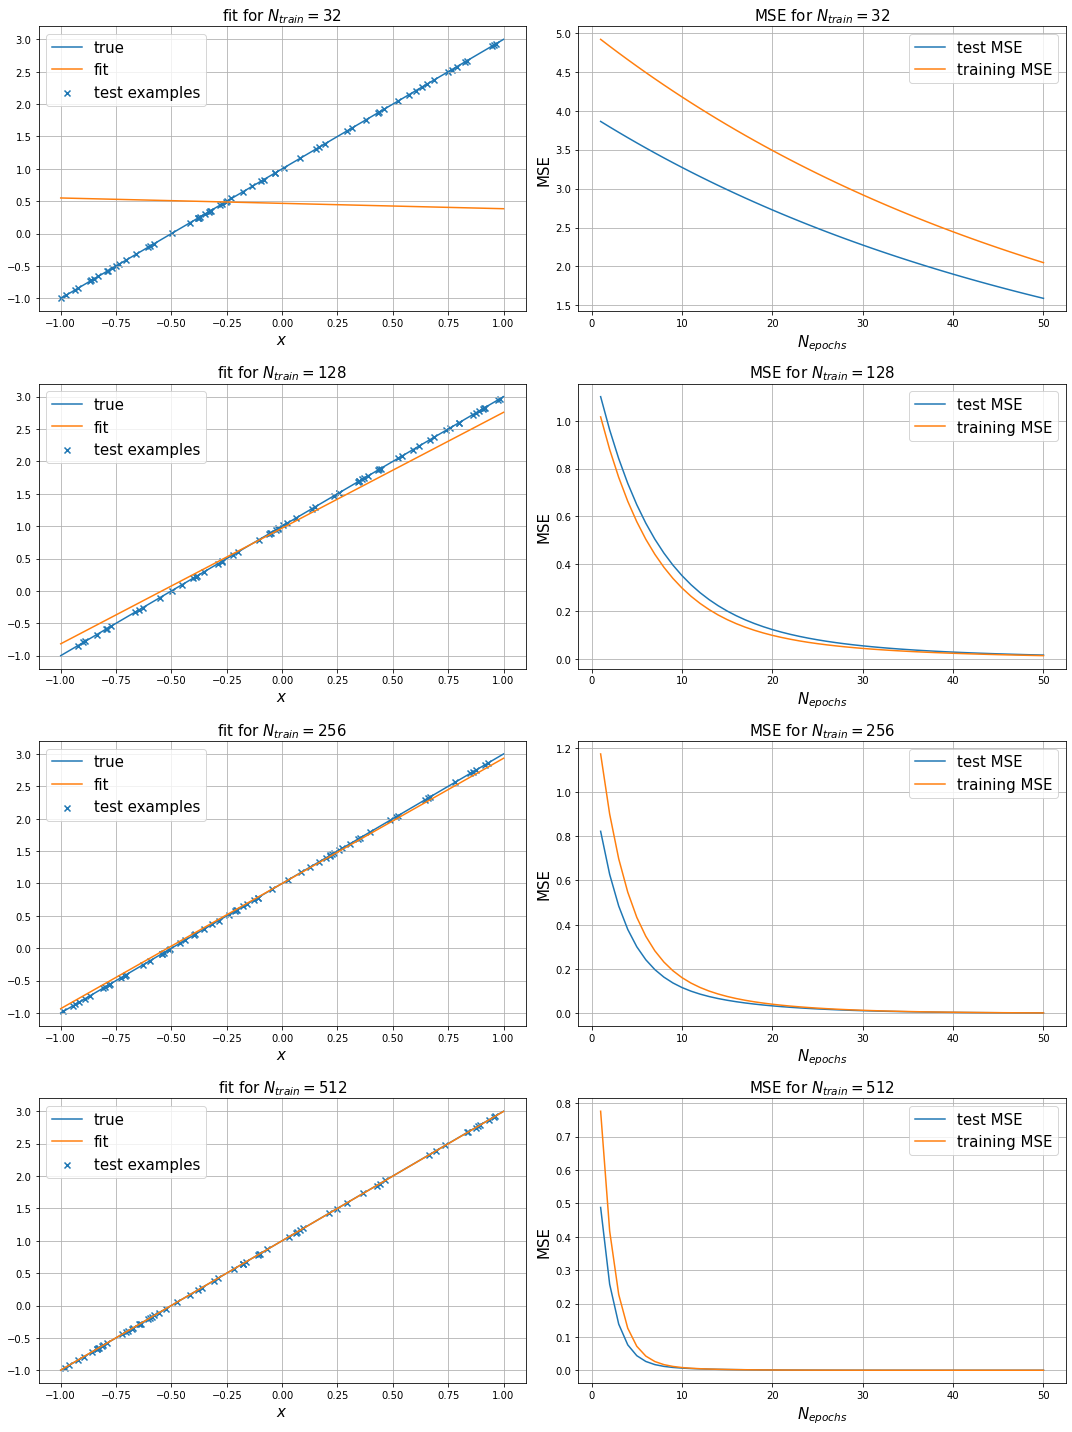

In [40]:
N_train = [32, 128, 256, 512]
N_test = 64
sigma = 0.0

N_epochs = 50

x = np.linspace(-1, 1, 100)

fig, ax = plt.subplots(len(N_train), 2, figsize=(15, 20))

for i in range(len(N_train)):
    # generate training and test examples from true model
    x_train, y_train, x_test, y_test = gen_data(f_linear, N_train[i], N_test, sigma)

    # initialize untrained NN
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    
    # fit model to data
    history = model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=N_epochs,
              shuffle=True,
              validation_data=(x_test, y_test),
              verbose=0)
    
    m_fit = model.get_weights()[0][0]
    b_fit = model.get_weights()[1][0]
    
    # plot linear fit and true model
    ax[i, 0].plot(x, f_linear(x), label="true")
    ax[i, 0].plot(x, m_fit * x + b_fit, label="fit")
    ax[i, 0].scatter(x_test, y_test, marker="x", label="test examples")
    ax[i, 0].legend(fontsize=15)
    ax[i, 0].set_xlabel("$x$", size=15)
    ax[i, 0].set_title("fit for $N_{train} = $" + str(N_train[i]), size=15)
    ax[i, 0].grid()
    
    # plot MSE
    ax[i, 1].plot(np.arange(1, N_epochs + 1), history.history["val_mse"], label="test MSE")
    ax[i, 1].plot(np.arange(1, N_epochs + 1), history.history["mse"], label="training MSE")
    ax[i, 1].legend(fontsize=15)
    ax[i, 1].set_xlabel("$N_{epochs}$", size=15)
    ax[i, 1].set_ylabel("MSE", size=15)
    ax[i, 1].set_title("MSE for $N_{train} = $" + str(N_train[i]), size=15)
    ax[i, 1].grid()
    
plt.tight_layout()
plt.show()

#### Noise $\sigma$

Finally, we include a Gaussian noise to our training and test data. Here, we keep $N_{epochs}=50$ and $N_{batches}=32$. We use $N_{train}=512$ training examples. The results are displayed in the figure below. Here, we also plot the test examples to illustrate the implemented amount of noise $\sigma$. We observe that the fit of our neural network is considerably robust as the fit is always in high agreement with the true model. Notably, the MSE for both the training and test set is generally larger for a larger noise value $\sigma$ because the data points are in general farer away from the true model.

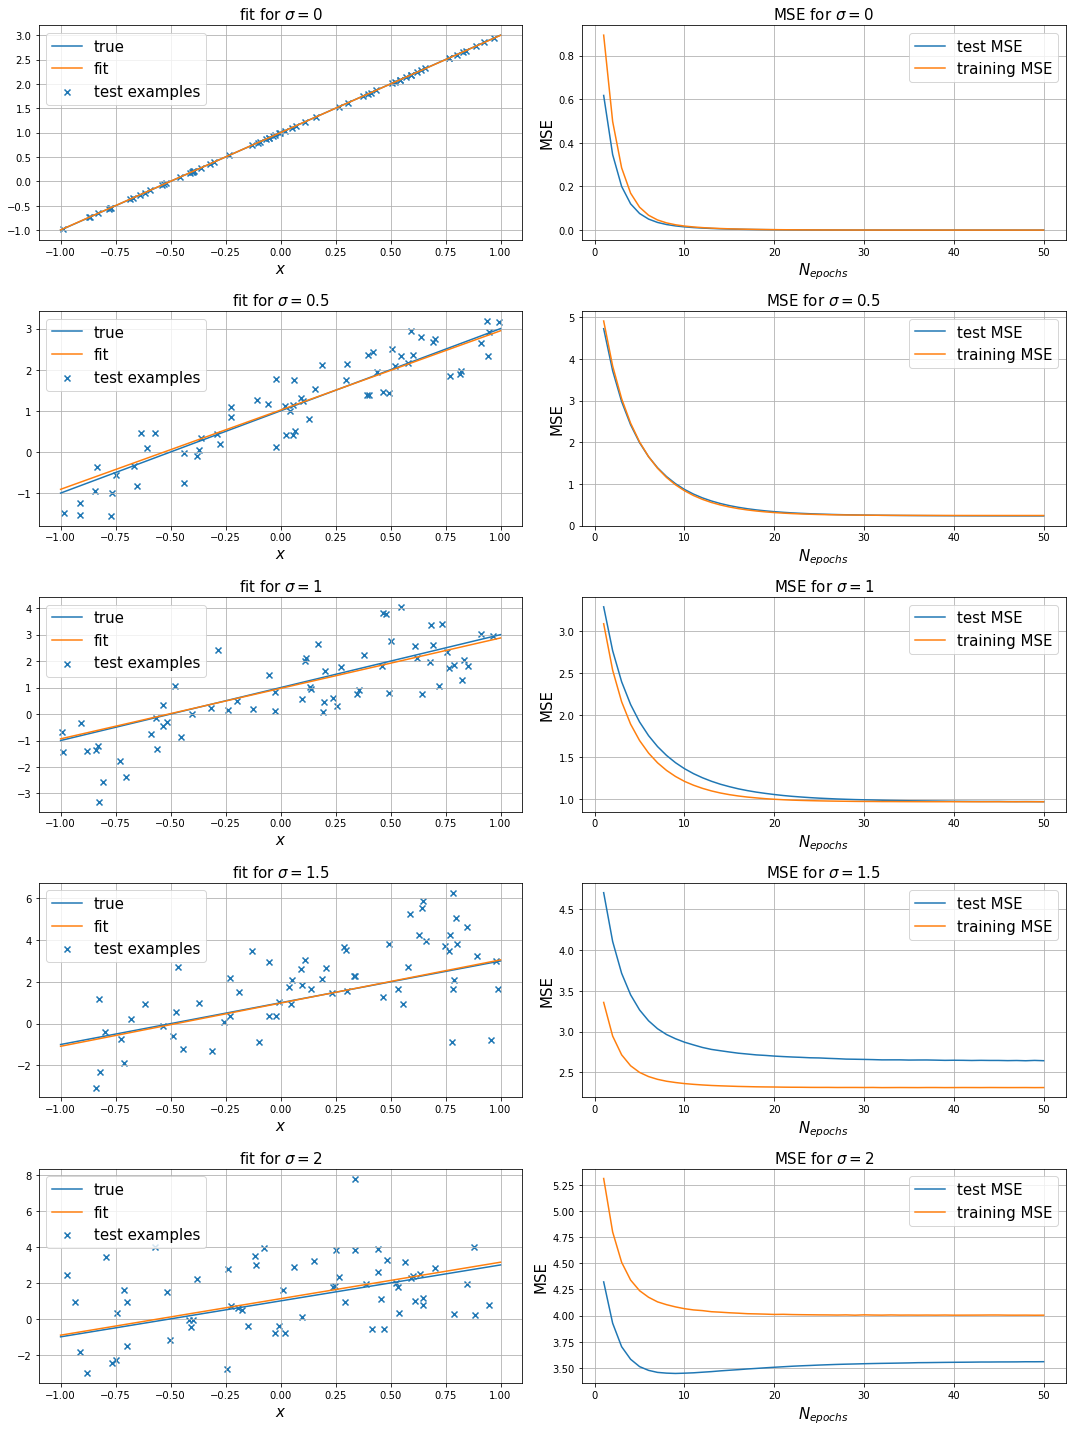

In [19]:
N_train = 512
N_test = 64
sigma = [0, 0.5, 1, 1.5, 2]

N_epochs = 50

x = np.linspace(-1, 1, 100)

fig, ax = plt.subplots(len(sigma), 2, figsize=(15, 20))

for i in range(len(sigma)):
    # generate training and test examples from true model
    x_train, y_train, x_test, y_test = gen_data(f_linear, N_train, N_test, sigma[i])

    # initialize untrained NN
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    
    # fit model to data
    history = model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=N_epochs,
              shuffle=True,
              validation_data=(x_test, y_test),
              verbose=0)
    
    m_fit = model.get_weights()[0][0]
    b_fit = model.get_weights()[1][0]
    
    # plot training data
    ax[i, 0].scatter(x_test, y_test, label="test examples", marker="x")
    
    # plot linear fit and true model
    ax[i, 0].plot(x, f_linear(x), label="true")
    ax[i, 0].plot(x, m_fit * x + b_fit, label="fit")
    ax[i, 0].legend(fontsize=15)
    ax[i, 0].set_xlabel("$x$", size=15)
    ax[i, 0].set_title("fit for $\sigma = $" + str(sigma[i]), size=15)
    ax[i, 0].grid()
    
    # plot MSE
    ax[i, 1].plot(np.arange(1, N_epochs + 1), history.history["val_mse"], label="test MSE")
    ax[i, 1].plot(np.arange(1, N_epochs + 1), history.history["mse"], label="training MSE")
    ax[i, 1].legend(fontsize=15)
    ax[i, 1].set_xlabel("$N_{epochs}$", size=15)
    ax[i, 1].set_ylabel("MSE", size=15)
    ax[i, 1].set_title("MSE for $\sigma = $" + str(sigma[i]), size=15)
    ax[i, 1].grid()
    
plt.tight_layout()
plt.show()

### Exercise 11.2

In the second assignment of this exercise sheet, we expand our neural network in order to fit a polynomial of order $3$:

$$ f(x)=4-3x-2x^2+3x^3.$$

Again, we focus on taking training examples from the range $x \in [-1, 1]$. However, we do check the quality of our fit outside this range, i.e. we analyze how well our neural network is able to perform extrapolation. In the next cell we define the necessary Python function:

In [43]:
def f_poly(x):
    return 4 - 3 * x - 2 * x**2 + 3 * x**3

#### Generating Training and Test Examples

In order to develop our neural network, we fix $N_{epochs} = 30$, $N_{batches} = 32$ and $N_{train} = 2048$. As above, we use $N_{test} = 64$ test examples. In addition, we implement a modest noise using $\sigma = 0.25$ to simulate realistic data. First, let us define some variables and generate the data:

In [42]:
N_epochs = 30
N_batches = 32
N_train = 2048
N_test = 64
sigma = 0.25

# generate training and test examples from true model
x_train, y_train, x_test, y_test = gen_data(f_poly, N_train, N_test, sigma, (-1,), (1,))

#### Number of Layers and Neurons

First, we analyze the fit quality w.r.t. the the number of hidden layers and neurons of our deep neural network. Below, we plot the true model and the fit as well as some test examples in the lefthand panels for different network structures. In the lefthand panels, we display the corresponding training and test MSE as a function of the number of epochs $N_{epochs}$. As we can see, the quality of the fit increases when we increase the number of hidden layers and the number of neurons in these layers. In fact, the universal approximation theorem states that (almost) any function can be approximated with arbitrary precision using a neural network with just one hidden but with a lot of neurons. This can be seen for the neural network with the structure [1, 100, 1]. Note, that due to the dimensions of our data, we always have one neuron in our input and output layers. A good fit with a reasonable number of neurons is obtained with the structure [1, 4, 10, 6, 1]. In the following, we stick to this structure for further analysis.

We also observe that the prediction accuracy of all of our neural networks outside the training range $x\in[-1, 1]$ is very poor.

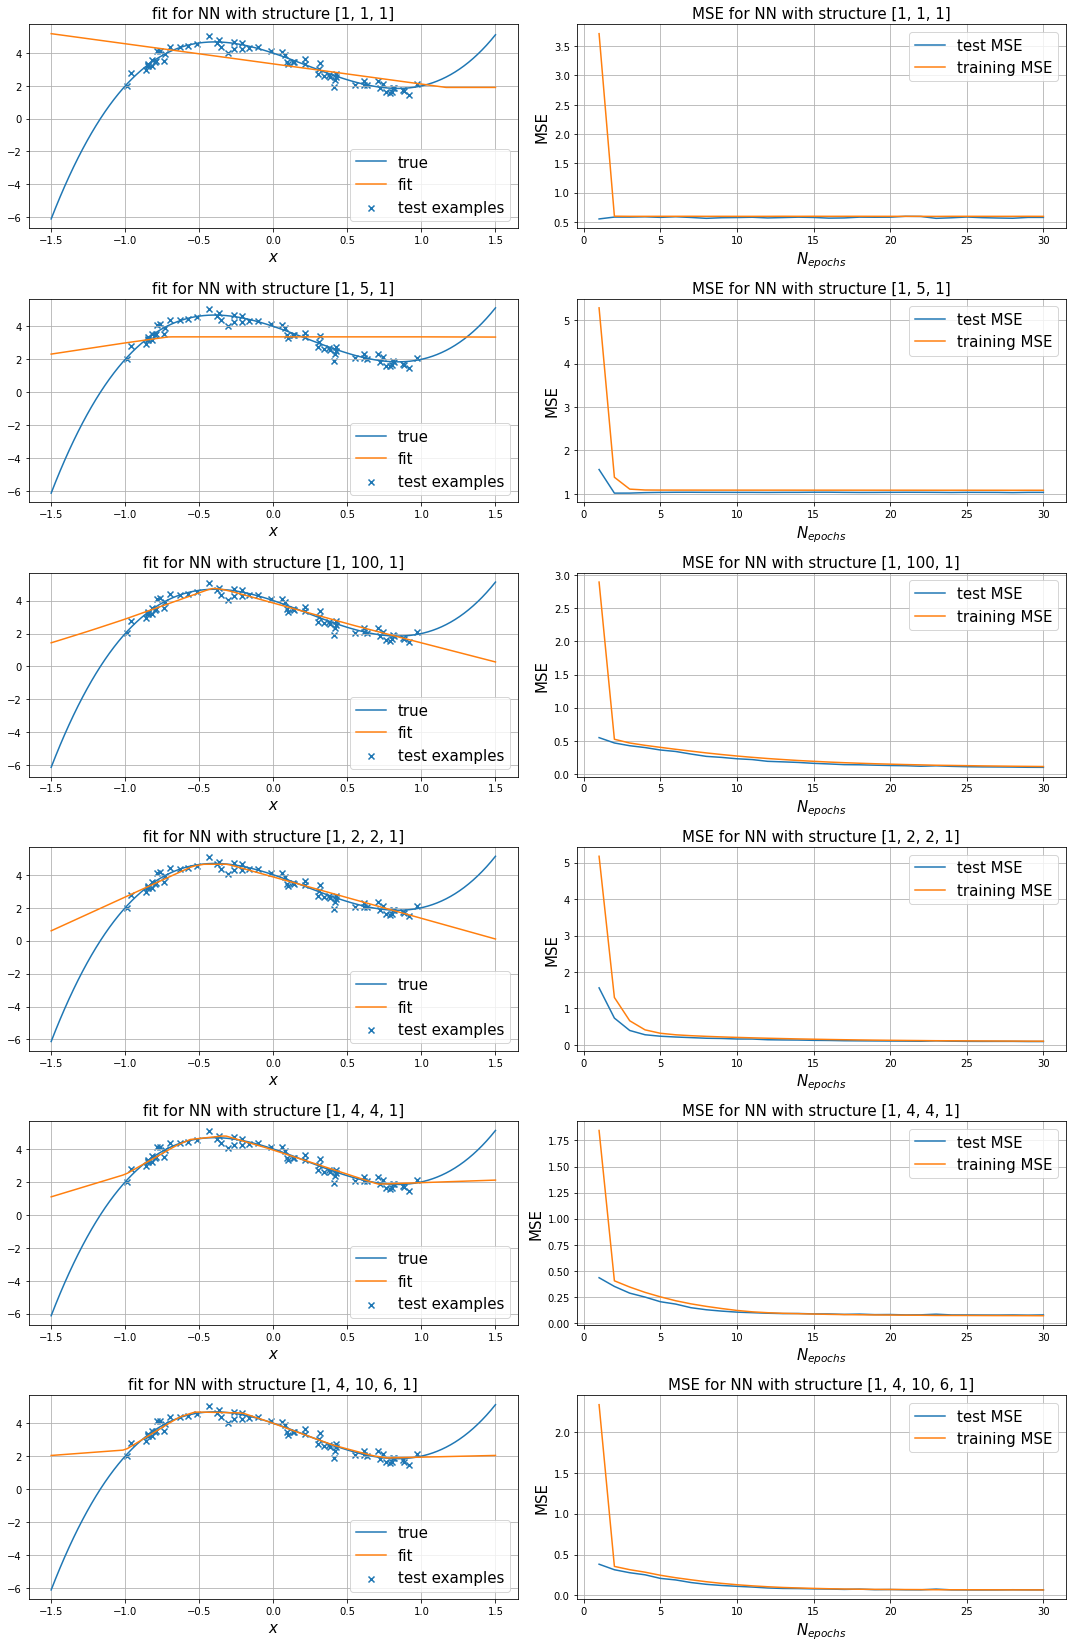

In [45]:
model_list = [] # list to store different NN architectures (all with relu activation function)
title_list = ["[1, 1, 1]", "[1, 5, 1]", "[1, 100, 1]", "[1, 2, 2, 1]", "[1, 4, 4, 1]", "[1, 4, 10, 6, 1]"]

# first model
model1 = tf.keras.Sequential()
model1.add(Dense(1, input_shape=(1,), activation="relu"))
model1.add(Dense(1))
model_list.append(model1)

# second model
model2 = tf.keras.Sequential()
model2.add(Dense(5, input_shape=(1,), activation="relu"))
model2.add(Dense(1))
model_list.append(model2)

# third model
model3 = tf.keras.Sequential()
model3.add(Dense(100, input_shape=(1,), activation="relu"))
model3.add(Dense(1))
model_list.append(model3)

# fourth model
model4 = tf.keras.Sequential()
model4.add(Dense(2, input_shape=(1,), activation="relu"))
model4.add(Dense(2, activation="relu"))
model4.add(Dense(1))
model_list.append(model4)

# fifth model
model5 = tf.keras.Sequential()
model5.add(Dense(4, input_shape=(1,), activation="relu"))
model5.add(Dense(4, activation="relu"))
model5.add(Dense(1))
model_list.append(model5)

# sixth model
model6 = tf.keras.Sequential()
model6.add(Dense(4, input_shape=(1,), activation="relu"))
model6.add(Dense(10, activation="relu"))
model6.add(Dense(6, activation="relu"))
model6.add(Dense(1))
model_list.append(model6)

fig, ax = plt.subplots(len(model_list), 2, figsize=(15, 23))
x_plot = np.linspace(-1.5, 1.5, 100)

for i, model in enumerate(model_list):
    
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    
    # fit model to data
    history = model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=N_epochs,
              shuffle=True,
              validation_data=(x_test, y_test),
              verbose=0)

    # compute prediction and true model
    y_true = f_poly(x_plot)
    y_predict = model.predict(x_plot)
    
    # plot fit, true model and test examples
    ax[i, 0].plot(x_plot, y_true, label="true")
    ax[i, 0].plot(x_plot, y_predict, label="fit")
    ax[i, 0].scatter(x_test, y_test, marker="x", label="test examples")
    ax[i, 0].legend(fontsize=15)
    ax[i, 0].set_xlabel("$x$", size=15)
    ax[i, 0].set_title("fit for NN with structure " + title_list[i], size=15)
    ax[i, 0].grid()
    
    # plot MSE
    ax[i, 1].plot(np.arange(1, N_epochs + 1), history.history["val_mse"], label="test MSE")
    ax[i, 1].plot(np.arange(1, N_epochs + 1), history.history["mse"], label="training MSE")
    ax[i, 1].legend(fontsize=15)
    ax[i, 1].set_xlabel("$N_{epochs}$", size=15)
    ax[i, 1].set_ylabel("MSE", size=15)
    ax[i, 1].set_title("MSE for NN with structure " + title_list[i], size=15)
    ax[i, 1].grid()
    
plt.tight_layout()
plt.show()

#### Activation Function

In the next figure, we examine how the choice of the activation function for the neurons affects the results of the fit of our true model with our neural network structure from above. As we can see, the relu-, elu- and the selu-function lead to good results. For the softplus-function, the convergence as a function of the number of epochs $N_{epochs}$ seems to be slower than for the other activation functions. The neural network that applies a linear activation is only able to predict a linear relationship. 

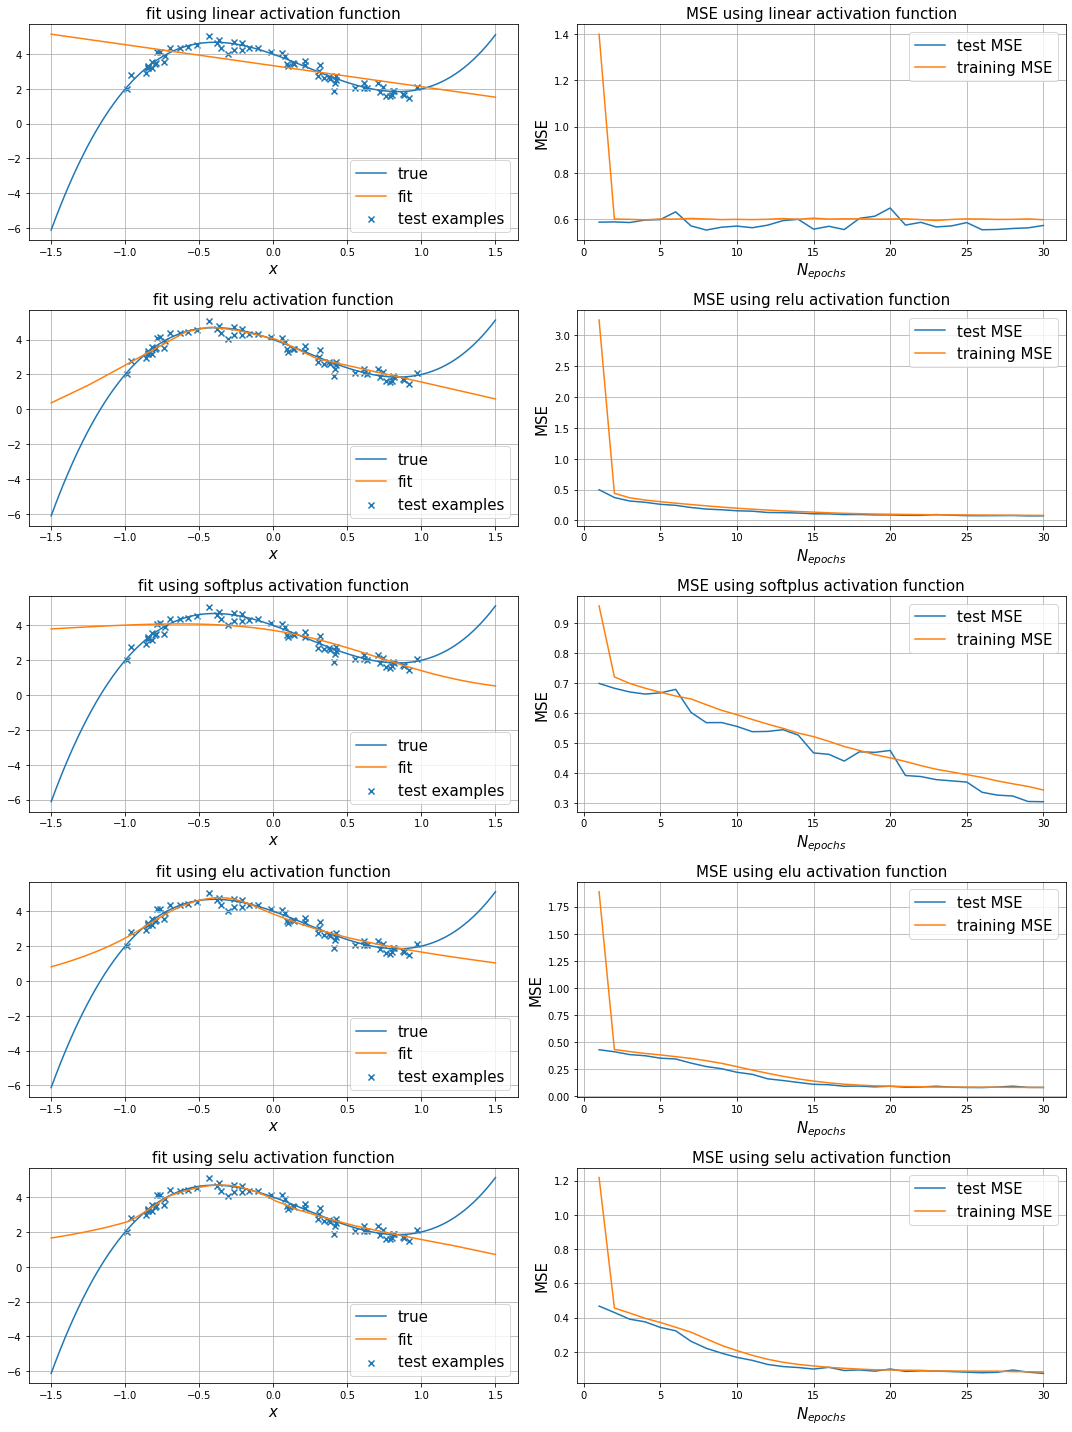

In [47]:
actfunc_list = ["linear", "relu", "softplus", "elu", "selu"] # list of different activation functions

fig, ax = plt.subplots(len(actfunc_list), 2, figsize=(15, 20))
x_plot = np.linspace(-1.5, 1.5, 100)

for i, actfunc in enumerate(actfunc_list):

    # model
    model = tf.keras.Sequential()
    model.add(Dense(4, input_shape=(1,), activation=actfunc))
    model.add(Dense(10, activation=actfunc))
    model.add(Dense(6, activation=actfunc))
    model.add(Dense(1))
    
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    
    # fit model to data
    history = model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=N_epochs,
              shuffle=True,
              validation_data=(x_test, y_test),
              verbose=0)
    
    # compute prediction and true model
    y_true = f_poly(x_plot)
    y_predict = model.predict(x_plot)
    
    # plot fit, true model and test examples
    ax[i, 0].plot(x_plot, y_true, label="true")
    ax[i, 0].plot(x_plot, y_predict, label="fit")
    ax[i, 0].scatter(x_test, y_test, marker="x", label="test examples")
    ax[i, 0].legend(fontsize=15)
    ax[i, 0].set_xlabel("$x$", size=15)
    ax[i, 0].set_title("fit using " + actfunc + " activation function", size=15)
    ax[i, 0].grid()
    
    # plot MSE
    ax[i, 1].plot(np.arange(1, N_epochs + 1), history.history["val_mse"], label="test MSE")
    ax[i, 1].plot(np.arange(1, N_epochs + 1), history.history["mse"], label="training MSE")
    ax[i, 1].legend(fontsize=15)
    ax[i, 1].set_xlabel("$N_{epochs}$", size=15)
    ax[i, 1].set_ylabel("MSE", size=15)
    ax[i, 1].set_title("MSE using " + actfunc + " activation function", size=15)
    ax[i, 1].grid()
    
plt.tight_layout()
plt.show()    

#### Optimizer

Next, we examine different algorithms to optimize the weights of our neural network from above with a relu activation function. We observe that the optimizers differ mostly in the speed of convergence w.r.t. the number of epochs $N_{epoch}$. The best optimizer for the present task seems to be the Adam optimizer. The Adagrad, Adadelta and Ftrl do not lead to reasonable solutions for the fit of our polynomial.

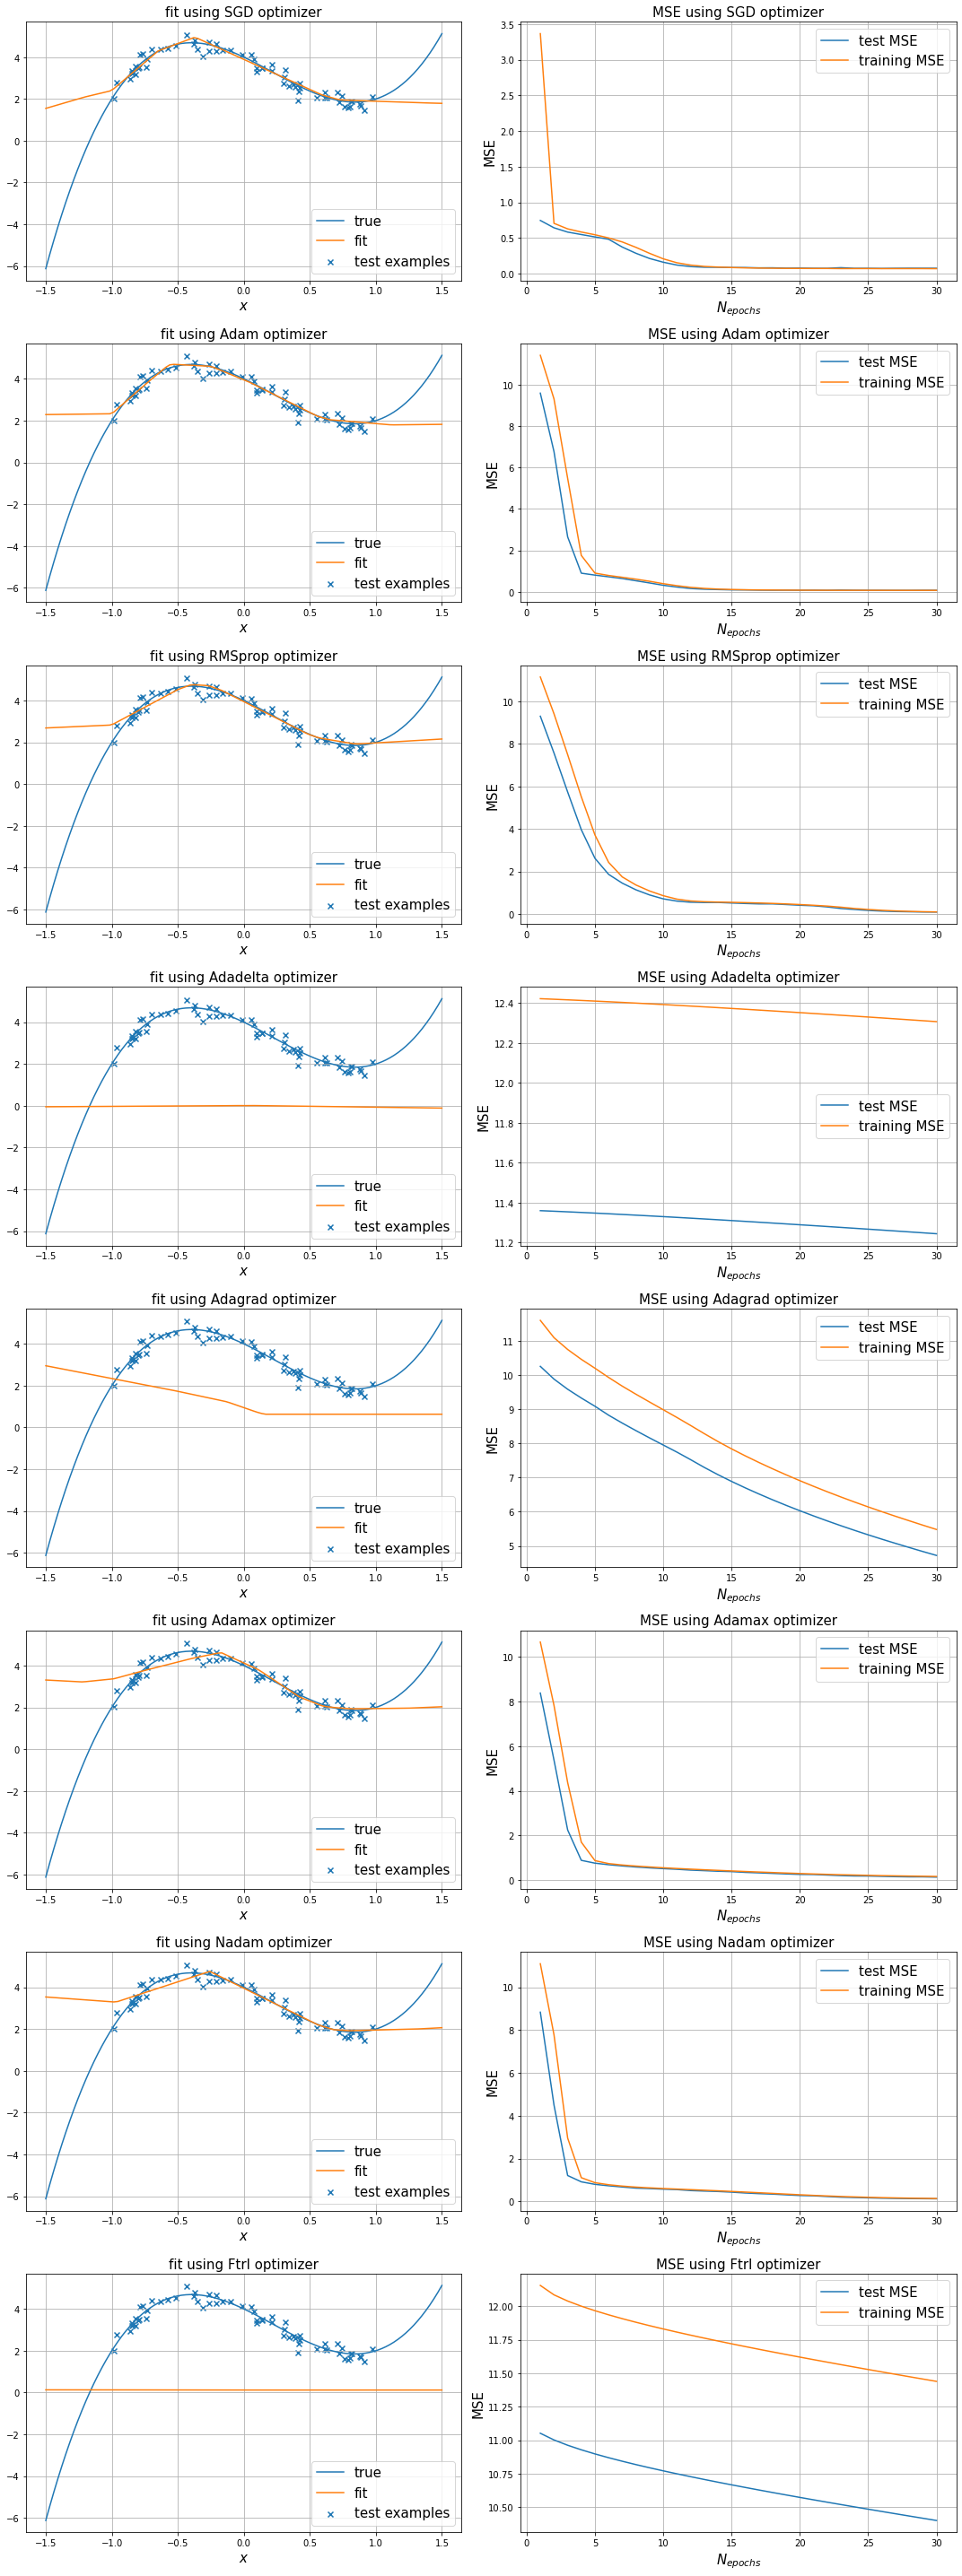

In [50]:
opt_list = ["SGD", "Adam", "RMSprop", "Adadelta", "Adagrad", "Adamax", "Nadam", "Ftrl"] # list of different optimizers
actfunc = "relu"

fig, ax = plt.subplots(len(opt_list), 2, figsize=(15, 40))
x_plot = np.linspace(-1.5, 1.5, 100)

for i, opt in enumerate(opt_list):

    # model
    model = tf.keras.Sequential()
    model.add(Dense(4, input_shape=(1,), activation=actfunc))
    model.add(Dense(10, activation=actfunc))
    model.add(Dense(6, activation=actfunc))
    model.add(Dense(1))
    
    model.compile(optimizer=opt, loss='mse', metrics=['mse'])
    
    # fit model to data
    history = model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=N_epochs,
              shuffle=True,
              validation_data=(x_test, y_test),
              verbose=0)
    
    # compute prediction and true model
    y_true = f_poly(x_plot)
    y_predict = model.predict(x_plot)
    
    # plot fit, true model and test examples
    ax[i, 0].plot(x_plot, y_true, label="true")
    ax[i, 0].plot(x_plot, y_predict, label="fit")
    ax[i, 0].scatter(x_test, y_test, marker="x", label="test examples")
    ax[i, 0].legend(fontsize=15)
    ax[i, 0].set_xlabel("$x$", size=15)
    ax[i, 0].set_title("fit using " + opt + " optimizer", size=15)
    ax[i, 0].grid()
    
    # plot MSE
    ax[i, 1].plot(np.arange(1, N_epochs + 1), history.history["val_mse"], label="test MSE")
    ax[i, 1].plot(np.arange(1, N_epochs + 1), history.history["mse"], label="training MSE")
    ax[i, 1].legend(fontsize=15)
    ax[i, 1].set_xlabel("$N_{epochs}$", size=15)
    ax[i, 1].set_ylabel("MSE", size=15)
    ax[i, 1].set_title("MSE using " + opt + " optimizer", size=15)
    ax[i, 1].grid()
    
plt.tight_layout()
plt.show()    

### Loss Function

Finally, different losses - that tell us what is a "good" prediction - can be applied. We use the neural network structure from above with the relu activation function and the Adam optimizer. Among the loss functions analyzed in the next figure, all of them except the mean squared logarithmic error lead to similar results. The logcosh loss function as weel as the mean squared logarithmic error seem to have a slightly slower speed of convergence compared to the mean squared error and the mean absolute error.

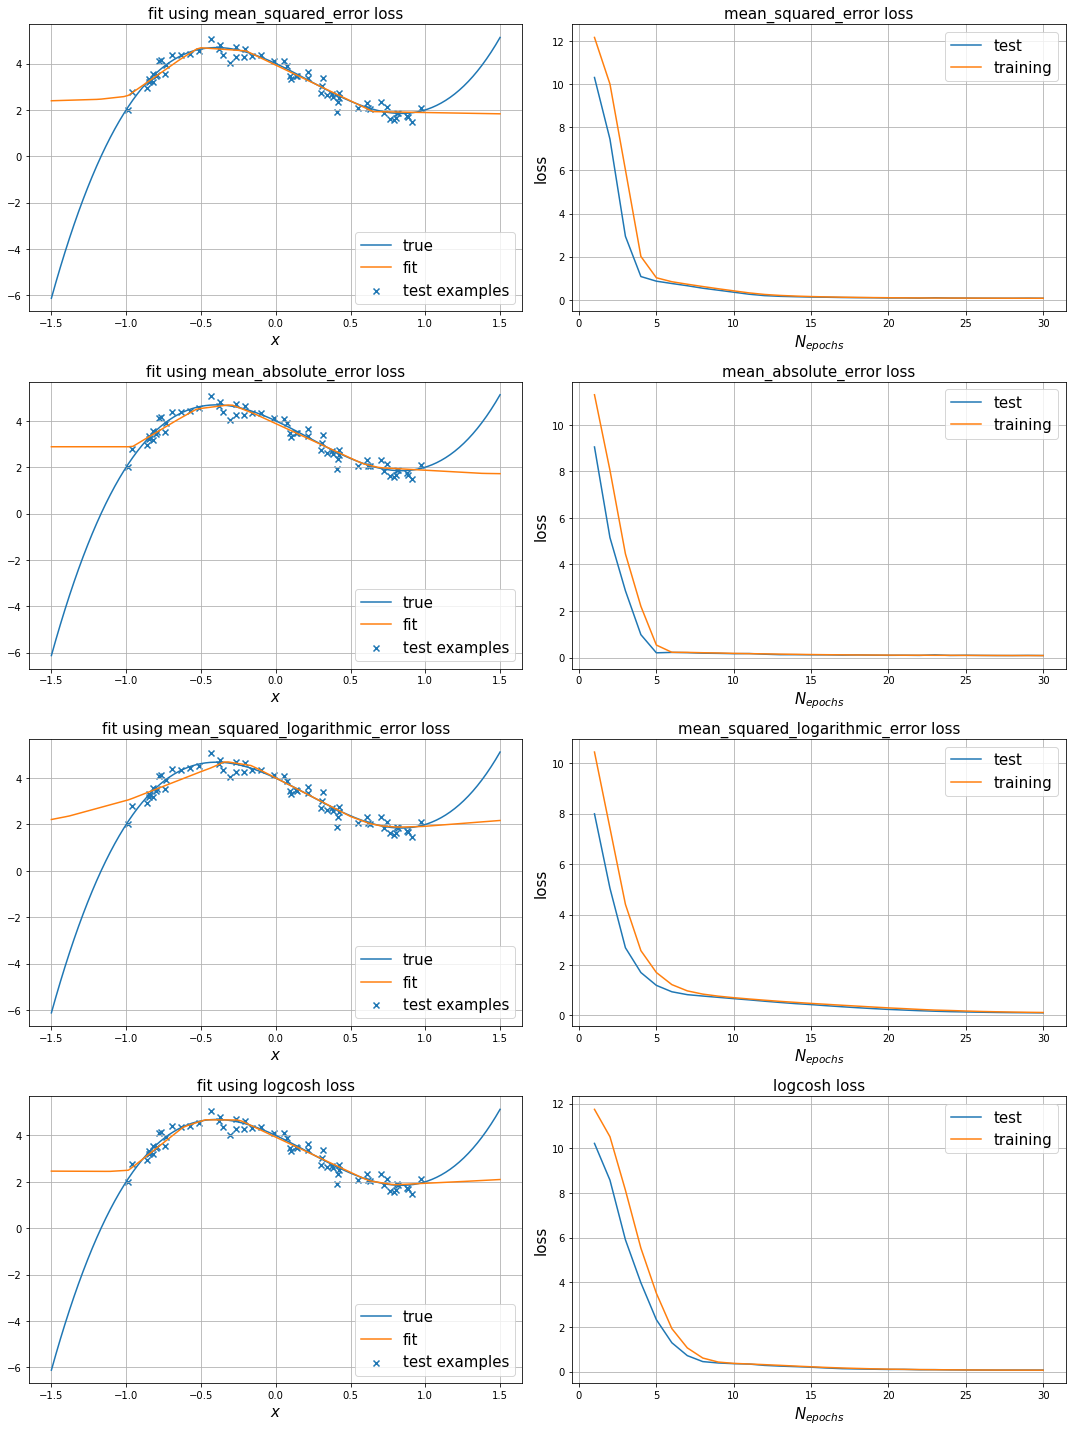

In [54]:
loss_list = ["mean_squared_error", "mean_absolute_error", "mean_squared_logarithmic_error", "logcosh"] # list of different losses
actfunc = "relu"
opt = "Adam"

fig, ax = plt.subplots(len(loss_list), 2, figsize=(15, 20))
x_plot = np.linspace(-1.5, 1.5, 100)

for i, loss in enumerate(loss_list):

    # model
    model = tf.keras.Sequential()
    model.add(Dense(4, input_shape=(1,), activation=actfunc))
    model.add(Dense(10, activation=actfunc))
    model.add(Dense(6, activation=actfunc))
    model.add(Dense(1))
    
    model.compile(optimizer=opt, loss=loss, metrics=['mse'])
    
    # fit model to data
    history = model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=N_epochs,
              shuffle=True,
              validation_data=(x_test, y_test),
              verbose=0)
    
    # compute prediction and true model
    y_true = f_poly(x_plot)
    y_predict = model.predict(x_plot)
    
    # plot fit, true model and test examples
    ax[i, 0].plot(x_plot, y_true, label="true")
    ax[i, 0].plot(x_plot, y_predict, label="fit")
    ax[i, 0].scatter(x_test, y_test, marker="x", label="test examples")
    ax[i, 0].legend(fontsize=15)
    ax[i, 0].set_xlabel("$x$", size=15)
    ax[i, 0].set_title("fit using " + loss + " loss", size=15)
    ax[i, 0].grid()
    
    # plot MSE
    ax[i, 1].plot(np.arange(1, N_epochs + 1), history.history["val_mse"], label="test")
    ax[i, 1].plot(np.arange(1, N_epochs + 1), history.history["mse"], label="training")
    ax[i, 1].legend(fontsize=15)
    ax[i, 1].set_xlabel("$N_{epochs}$", size=15)
    ax[i, 1].set_ylabel("loss", size=15)
    ax[i, 1].set_title(loss + " loss", size=15)
    ax[i, 1].grid()
    
plt.tight_layout()
plt.show()    

#### Summary

All in all, the quality of our fit, and thus of our predictions, depends strongly on the structure of our deep neural network in terms of the number of hidden layers and the number of neurons in these layers. In general, the accuracy of the fit increases with more hidden layers and with more neurons. Other parameters like the activation function, the optimizer, and the loss function have a minor effect. Mostly a good choice of these paramers is able to improve the quality of our fit slightly. Only in some cases, e.g. an inadequate activation function or optimizer, leads to completely wrong results. In general, the neural network is not able to make (reasonable) predictions outside its training range $x \in [-1, 1]$, i.e. neural networks cannot be used for extrapolation.

### Exercise 11.3

In the last exercise of this exercise sheet, we want to fit the more complex function:

$$ f_{2D}(x, y) = \sin(x^2+y^2).$$

We are interested in the interval $x\in[-3/2,3/2]$ and $y\in[-3/2,3/2]$. 

First, we generate $N_{train} = 1028$ training and $N_{test}=1028$ test examples from $f_{2D}$ using a noise of $\sigma = 0.25$:

In [70]:
N_train = 1028
N_test = 4096
sigma = 0.25

def f_2D(x):
    return np.sin(x[:, 0]**2 + x[:, 1]**2)

# generate training and test examples from true model
x_train, y_train, x_test, y_test = gen_data(f_2D, N_train, N_test, sigma, (-1.5,-1.5), (1.5,1.5))

#### Fit with NN Structure [1, 4, 10, 6, 1]

In order to fit the training examples drawn from $f_{2D}$, first, we apply our neural network from above using relu activation functions, the Adam optimizer, and the MSE loss function. The structure of the deep neural network is [1, 4, 10, 6, 1]. We train for a total of $200$ epochs with a batch size of $32$. We observe that the neural network is able to minimize the MSE loss as a function of the number of epochs $N_{epochs}$.

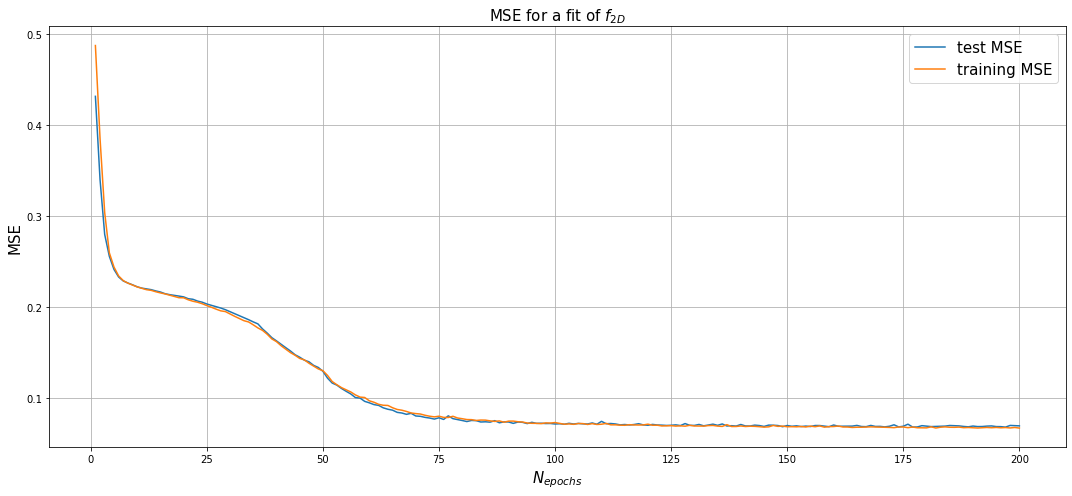

In [66]:
actfunc = "relu"
opt = "Adam"
loss = "MSE"
N_epochs = 200

# model
model = tf.keras.Sequential()
model.add(Dense(4, input_shape=(2,), activation=actfunc))
model.add(Dense(10, activation=actfunc))
model.add(Dense(6, activation=actfunc))
model.add(Dense(1))

model.compile(optimizer=opt, loss=loss, metrics=['mse'])

# fit model to data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=N_epochs,
          shuffle=True,
          validation_data=(x_test, y_test),
          verbose=0)

# plot MSE
plt.figure(figsize=(15, 7))
plt.plot(np.arange(1, N_epochs + 1), history.history["val_mse"], label="test MSE")
plt.plot(np.arange(1, N_epochs + 1), history.history["mse"], label="training MSE")
plt.legend(fontsize=15)
plt.xlabel("$N_{epochs}$", size=15)
plt.ylabel("MSE", size=15)
plt.title("MSE for a fit of $f_{2D}$", size=15)
plt.tight_layout()
plt.grid()

In the figure below, we plot the the test examples and the corresponding predictions of our neural network. The predictions seem to be quite accurate. However, the might still be some possible improvements.

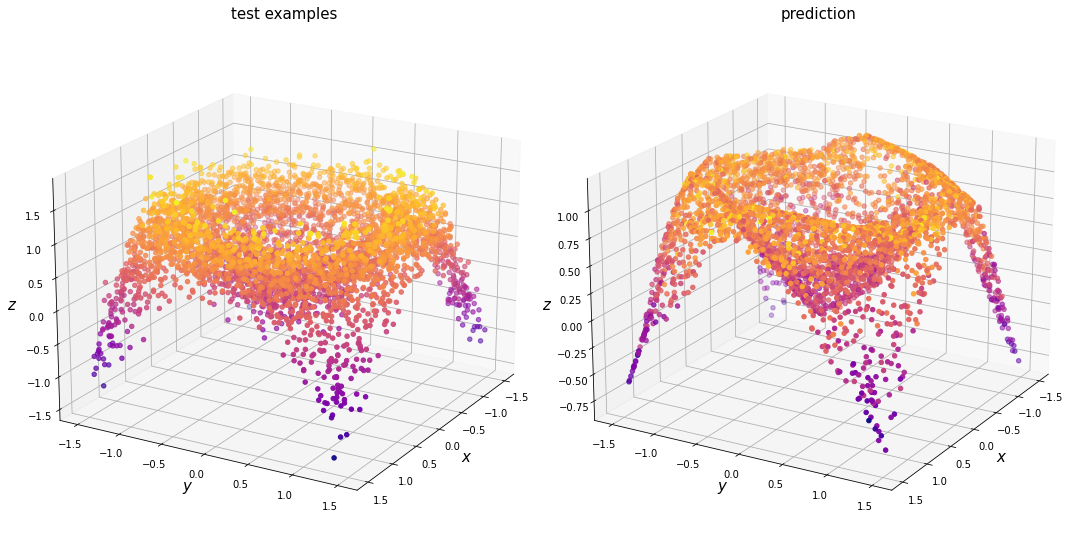

In [71]:
from mpl_toolkits.mplot3d import Axes3D

y_pred = model.predict(x_test)

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(x_test[:,0], x_test[:,1], y_test, c=y_test, cmap='plasma')
ax.set_xlabel("$x$", size=15)
ax.set_ylabel("$y$", size=15)
ax.set_zlabel("$z$", size=15)
ax.view_init(20, 30)
ax.set_title("test examples", size=15)


ax = fig.add_subplot(122, projection='3d')
ax.scatter(x_test[:,0], x_test[:,1], y_pred, c=y_test, cmap='plasma')
ax.set_xlabel("$x$", size=15)
ax.set_ylabel("$y$", size=15)
ax.set_zlabel("$z$", size=15)
ax.view_init(20, 30)
ax.set_title("prediction", size=15)

plt.tight_layout()
plt.show()

#### Fit with NN structure [1, 50, 150, 100, 50, 1]

The next figure shows the same fit using a neural network structure [1, 50, 150, 100, 50, 1]. In comparison to our results from the less complex neural network above, the test MSE does not decrease signficantly. Rather, as the training error seems to decrease, we increase the risk of overfitting the training examples. 

So, the result of our previous - more simple - neural network leads to satisfactory results for the fit of $f_{2D}$. Note, that more complex functions might actually require more complex neural networks. One has to verify this by checking if a more complex neural network leads to a further decrease in the test MSE. In the present example, it becomes clear that a more complex neural network does not necessarily increase the prediction accuracy.

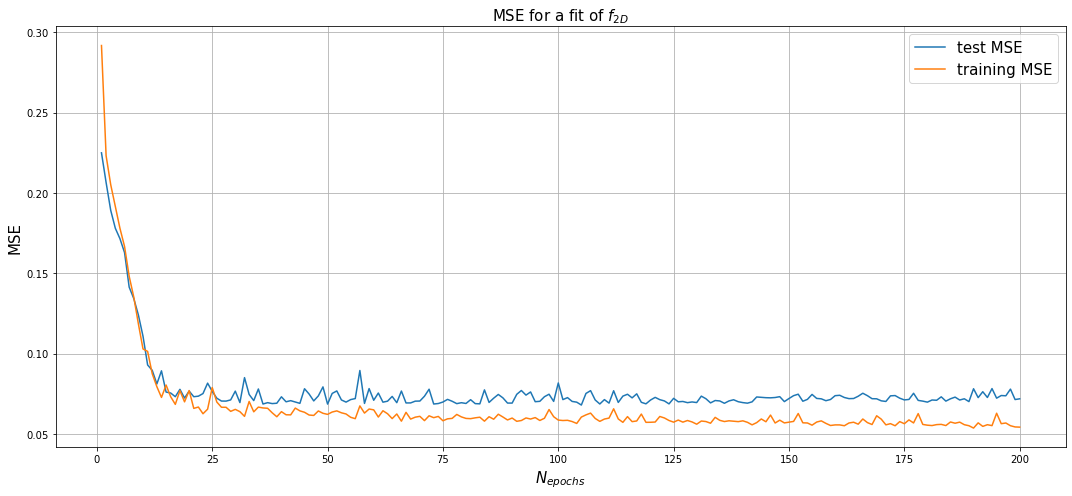

In [74]:
actfunc = "relu"
opt = "Adam"
loss = "MSE"
N_epochs = 200

# model
model = tf.keras.Sequential()
model.add(Dense(50, input_shape=(2,), activation=actfunc))
model.add(Dense(150, activation=actfunc))
model.add(Dense(100, activation=actfunc))
model.add(Dense(50, activation=actfunc))
model.add(Dense(1))

model.compile(optimizer=opt, loss=loss, metrics=['mse'])

# fit model to data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=N_epochs,
          shuffle=True,
          validation_data=(x_test, y_test),
          verbose=0)

# plot MSE
plt.figure(figsize=(15, 7))
plt.plot(np.arange(1, N_epochs + 1), history.history["val_mse"], label="test MSE")
plt.plot(np.arange(1, N_epochs + 1), history.history["mse"], label="training MSE")
plt.legend(fontsize=15)
plt.xlabel("$N_{epochs}$", size=15)
plt.ylabel("MSE", size=15)
plt.title("MSE for a fit of $f_{2D}$", size=15)
plt.tight_layout()
plt.grid()